# EDA

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calplot
from wordcloud import WordCloud as wc

# Streaming History

In [ ]:
finalDf = pd.read_csv('cdata/finalCleaned.csv')

In [5]:
finalDf.head()

,Unnamed: 0,artistName,trackName,msPlayed,datetime,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,time_signature
0,0,Halsey,Gasoline,199593,2020-05-12 08:49:00,0.731,0.580,10,-7.328,0,0.0399,0.2230,0.0,0.1290,0.319,120.001,2IO7yf562c1zLzpanal1DT,4
1,1,Dua Lipa,IDGAF,150004,2020-05-24 15:36:00,0.782,0.728,5,-5.930,1,0.0768,0.4270,0.0,0.2500,0.876,97.975,4ZUpTMKPYFTfJqamWFU9Zv,4
2,2,Dua Lipa,IDGAF,213981,2020-05-28 09:21:00,0.782,0.728,5,-5.930,1,0.0768,0.4270,0.0,0.2500,0.876,97.975,4ZUpTMKPYFTfJqamWFU9Zv,4
3,3,Jack & Jack,No One Compares To You,177858,2020-05-28 09:25:00,0.700,0.747,1,-6.044,1,0.0436,0.1270,0.0,0.0941,0.629,111.941,4cZ3UsiKd1kUQIaq4BFIj2,4
4,4,Why Don't We,Big Plans,146083,2020-05-28 09:27:00,0.693,0.604,11,-5.279,1,0.0427,0.0668,0.0,0.1140,0.651,75.014,448hSkxDU1sUQQauBWZVcC,4


In [41]:
finalDf = finalDf.drop(columns=['Unnamed: 0'])

In [7]:
finalDf.head()

,artistName,trackName,msPlayed,datetime,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,time_signature
0,Halsey,Gasoline,199593,2020-05-12 08:49:00,0.731,0.580,10,-7.328,0,0.0399,0.2230,0.0,0.1290,0.319,120.001,2IO7yf562c1zLzpanal1DT,4
1,Dua Lipa,IDGAF,150004,2020-05-24 15:36:00,0.782,0.728,5,-5.930,1,0.0768,0.4270,0.0,0.2500,0.876,97.975,4ZUpTMKPYFTfJqamWFU9Zv,4
2,Dua Lipa,IDGAF,213981,2020-05-28 09:21:00,0.782,0.728,5,-5.930,1,0.0768,0.4270,0.0,0.2500,0.876,97.975,4ZUpTMKPYFTfJqamWFU9Zv,4
3,Jack & Jack,No One Compares To You,177858,2020-05-28 09:25:00,0.700,0.747,1,-6.044,1,0.0436,0.1270,0.0,0.0941,0.629,111.941,4cZ3UsiKd1kUQIaq4BFIj2,4
4,Why Don't We,Big Plans,146083,2020-05-28 09:27:00,0.693,0.604,11,-5.279,1,0.0427,0.0668,0.0,0.1140,0.651,75.014,448hSkxDU1sUQQauBWZVcC,4


In [42]:
finalDf['minPlayed'] = (finalDf['msPlayed']/60000).round(2)

In [43]:
finalDf['date'] = pd.to_datetime(finalDf['datetime'].str[:10],format='%Y-%m-%d')

In [44]:
# streaming time per day, we need to create a time-series data
streamSum = finalDf.groupby('date',as_index=True).sum()

allDays = pd.DataFrame({'date':pd.date_range(start=min(finalDf['date'])
                                                       ,end=max(finalDf['date'])
                                                       )})

streamingTimePerDay = allDays.merge(streamSum,on='date',how='left',copy=False)
streamingTimePerDay=streamingTimePerDay.drop(streamingTimePerDay.loc[:,'artistName':'time_signature'],axis=1)
streamingTimePerDay.set_index('date',inplace=True)
streamingTimePerDay.head(3)


,minPlayed
date,
2020-05-12,3.33
2020-05-13,NaN
2020-05-14,NaN


In [45]:
streamingTimePerDayCal = streamingTimePerDay.squeeze()

(<Figure size 2000x1000 with 3 Axes>,
 array([<Axes: ylabel='2020'>, <Axes: ylabel='2021'>], dtype=object))

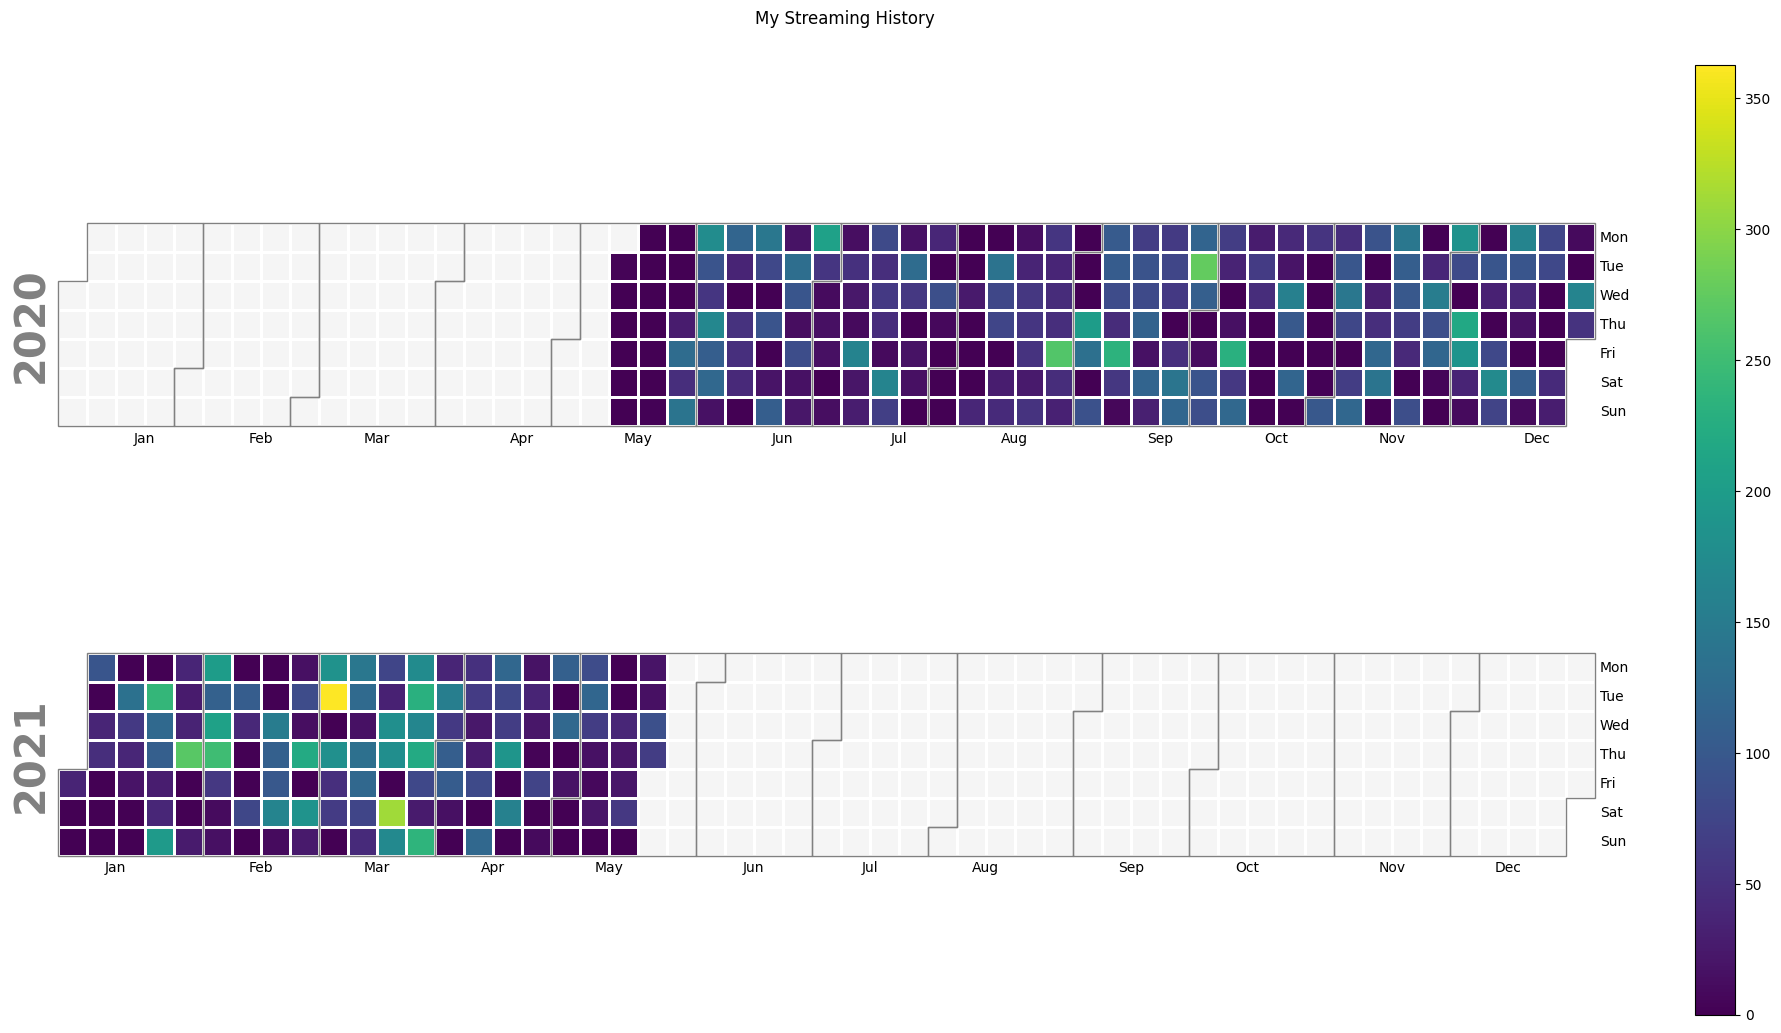

In [46]:
calplot.calplot(streamingTimePerDayCal, figsize=(20,10), suptitle='My Streaming History')

# Artist Summary

In [112]:
# Group by artistName and calculate the sum for numeric columns only
artist_summary = (
    finalDf.groupby('artistName', as_index=False)
    .agg({col: 'sum' for col in finalDf.select_dtypes(include='number').columns})
)

# If you want to add a unique song count, you can add it to the same aggregation
artist_summary['unique_song_count'] = finalDf.groupby('artistName')['trackName'].nunique().values


In [113]:
artist_summary.rename(columns={'trackName': 'unique_song_count', 'msPlayed': 'total_playtime'}, inplace=True)

In [114]:
artist_summary.head()

,artistName,total_playtime,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,minPlayed,unique_song_count
0,$teev,61156,0.589,0.442,4,-8.517,1,0.0291,0.334000,0.000424,0.0987,0.0904,122.688,3,1.02,1
1,2 Chainz,227893,0.556,0.899,8,-4.573,1,0.4070,0.051700,0.000000,0.0569,0.5620,172.078,4,3.80,1
2,3LAU,2353786,10.312,12.705,64,-61.429,5,0.7554,6.590650,0.000122,1.8584,9.9930,2193.291,60,39.25,5
3,5 Seconds of Summer,5547807,22.638,29.636,224,-156.397,30,7.0585,4.311069,0.000000,5.7670,22.3450,4613.890,160,92.43,5
4,88rising,148190,0.433,0.726,2,-5.742,1,0.0491,0.000163,0.000047,0.0703,0.1250,141.892,4,2.47,1


In [115]:
artist_summary.sort_values(by='minPlayed',ascending=False,inplace=True)

In [125]:
top10 = artist_summary.head(10)

In [126]:
top10

,artistName,total_playtime,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,minPlayed,unique_song_count
325,Jason Derulo,49263620,207.341,200.646,1210,-1383.898,173,51.6806,40.711760,0.158822,50.4416,177.0490,30867.073,1112,821.16,19
278,Halsey,41859486,137.187,151.572,1006,-1316.079,138,13.3460,33.749420,0.010611,33.1882,106.7650,25823.534,900,697.72,12
149,DEAMN,38943608,140.442,141.831,540,-1435.468,124,19.1338,35.315874,1.783876,42.4711,87.3046,24005.445,837,649.12,24
659,The Chainsmokers,37937587,124.554,114.656,1055,-1197.724,144,10.8702,43.687744,0.068918,30.6905,95.0030,20291.663,759,632.18,14
744,Zedd,36980558,135.968,159.747,660,-1122.566,196,11.7384,24.447877,1.790621,16.8364,145.8930,30837.852,814,616.26,15
632,Solve,34074526,19.307,22.729,224,-373.852,24,8.5376,8.179964,2.370792,8.8914,13.5320,4900.984,148,567.88,23
352,Jubël,30217844,126.785,138.763,1269,-1225.867,92,13.5654,46.493260,0.753782,27.6232,94.2590,24170.394,787,503.58,19
512,OMI,30153209,105.943,127.581,1217,-834.465,75,13.6853,23.384862,0.008871,36.2050,93.4980,21702.571,664,502.23,25
375,Kesha,26405738,111.666,108.933,885,-916.160,103,18.9743,25.651182,0.997208,25.4000,86.5592,18477.942,642,440.14,52
596,Sam Feldt,25000141,100.238,110.632,679,-636.954,134,15.6121,27.826060,0.087912,19.1160,88.7050,17810.937,604,416.97,18


# Barplot of Artist Summary

<ipython-input-128-589b08c2c2ca>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10['artistName'],y=top10['minPlayed'],palette='Blues_d')


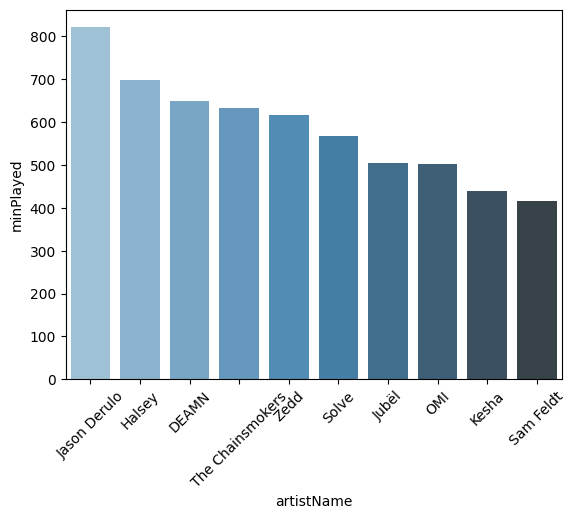

In [128]:
#barplot artistName vs minPlayed
sns.barplot(x=top10['artistName'],y=top10['minPlayed'],palette='Blues_d')
plt.xticks(rotation=45)
plt.show()


In [130]:
artistWcData = dict(zip(artist_summary['artistName'].tolist(), artist_summary['minPlayed'].tolist()))

# Wordcloud of Artist Summary

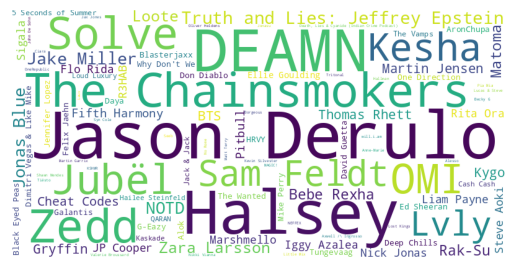

In [134]:
wordCloud = wc(background_color='white',width=800, height=400, max_words=100).generate_from_frequencies(artistWcData)
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

# Mood Depending on Songs

In [135]:
valence = finalDf.groupby('date')['valence'].aggregate(['min', np.mean, 'max'])

<ipython-input-135-983cba45c3e4>:1: FutureWarning: The provided callable <function mean at 0x7a7342101000> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  valence = finalDf.groupby('date')['valence'].aggregate(['min', np.mean, 'max'])


In [137]:
val = pd.merge(valence,finalDf,on='date',how='left')
val.head()

,date,min,mean,max,artistName,trackName,msPlayed,datetime,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,time_signature,minPlayed
0,2020-05-12,0.319,0.3190,0.319,Halsey,Gasoline,199593,2020-05-12 08:49:00,0.731,0.580,...,0,0.0399,0.2230,0.0,0.1290,0.319,120.001,2IO7yf562c1zLzpanal1DT,4,3.33
1,2020-05-24,0.876,0.8760,0.876,Dua Lipa,IDGAF,150004,2020-05-24 15:36:00,0.782,0.728,...,1,0.0768,0.4270,0.0,0.2500,0.876,97.975,4ZUpTMKPYFTfJqamWFU9Zv,4,2.50
2,2020-05-28,0.161,0.5701,0.876,Dua Lipa,IDGAF,213981,2020-05-28 09:21:00,0.782,0.728,...,1,0.0768,0.4270,0.0,0.2500,0.876,97.975,4ZUpTMKPYFTfJqamWFU9Zv,4,3.57
3,2020-05-28,0.161,0.5701,0.876,Jack & Jack,No One Compares To You,177858,2020-05-28 09:25:00,0.700,0.747,...,1,0.0436,0.1270,0.0,0.0941,0.629,111.941,4cZ3UsiKd1kUQIaq4BFIj2,4,2.96
4,2020-05-28,0.161,0.5701,0.876,Why Don't We,Big Plans,146083,2020-05-28 09:27:00,0.693,0.604,...,1,0.0427,0.0668,0.0,0.1140,0.651,75.014,448hSkxDU1sUQQauBWZVcC,4,2.43


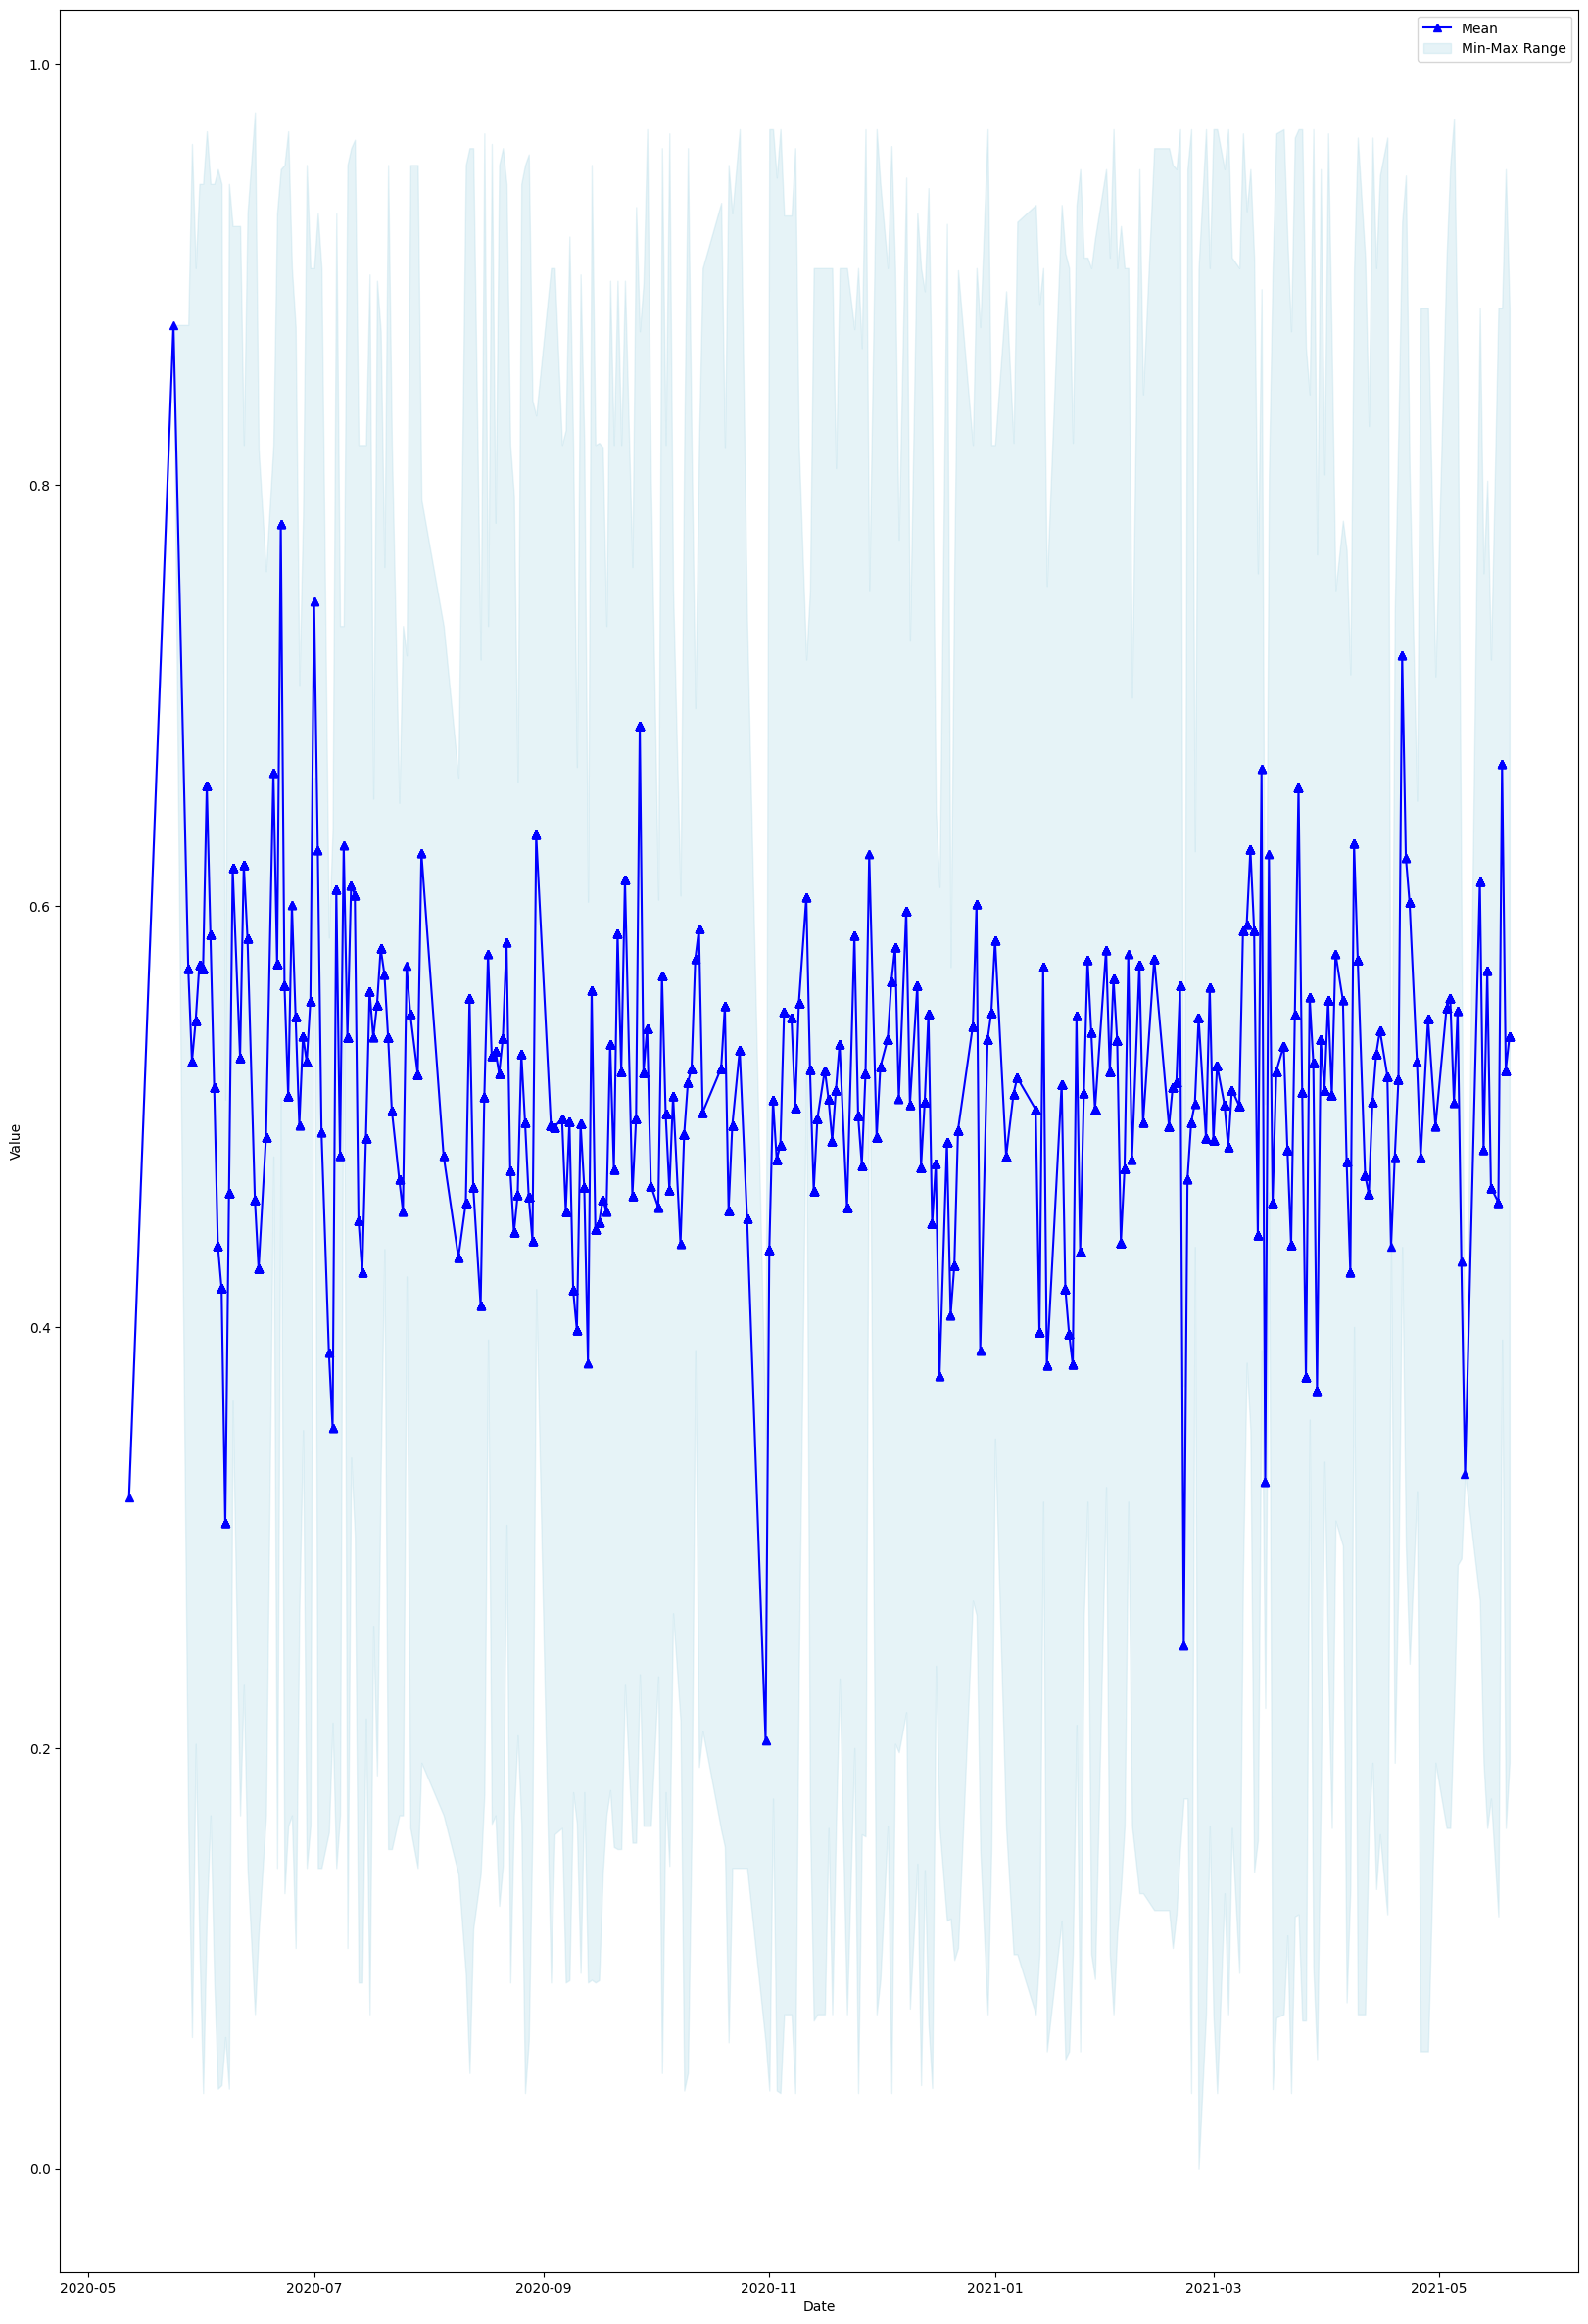

In [143]:
plt.plot(val["date"], val["mean"], marker='^', linestyle='-', color='b', label='Mean')

# Shaded error band for min-max range
plt.rcParams["figure.figsize"] = (20,10)
plt.fill_between(val["date"], val["min"], val["max"], color='lightblue', alpha=0.3, label='Min-Max Range')
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()

plt.show()

Listened to music across various generes, not just one.

# Analysing Features of Songs

In [ ]:
songData = pd.read_csv('cdata/finalDfDist.csv')
songData = songData.drop(columns=['Unnamed: 0'])

In [146]:
features = ['danceability', 'energy', 'key', 'loudness' ,'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence','tempo']

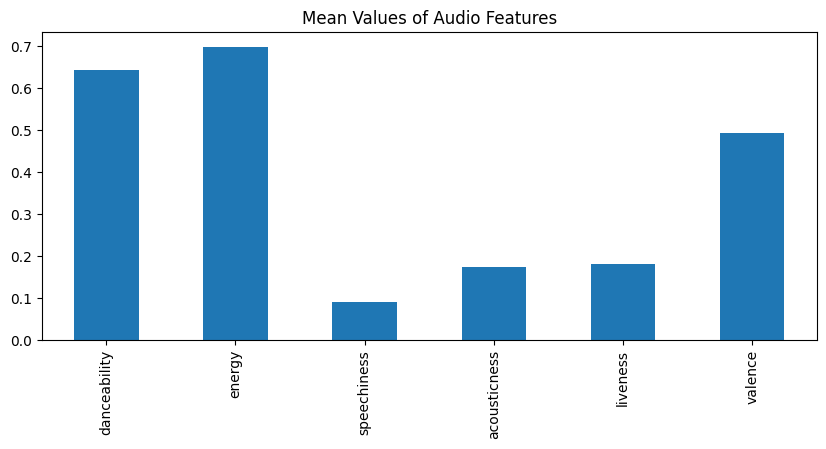

In [147]:
small = songData[['danceability', 'energy', 'speechiness', 'acousticness', 'liveness', 'valence']]
plt.figure(figsize=(10,4))
small.mean().plot.bar()
plt.title('Mean Values of Audio Features')
plt.show()

# Correlation between Features

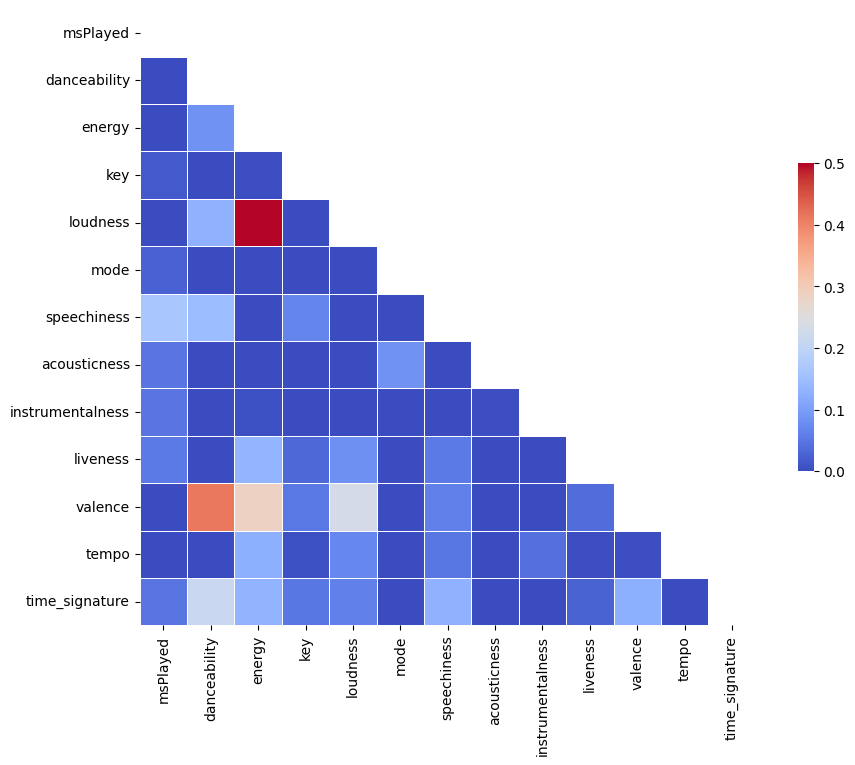

In [149]:
# Calculate correlation on numeric columns only and generate mask
corr = songData.select_dtypes(include=[np.number]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot heatmap
plt.figure(figsize=(11, 8))
sns.heatmap(corr, mask=mask, cmap="coolwarm", vmin=0, vmax=0.5, square=True,
            linewidths=0.5, cbar_kws={"shrink": 0.5})
plt.show()

Correlation observed:
- loudness <-> energy
- valence <-> danceability
- valence <-> energy
- valence <-> loudness

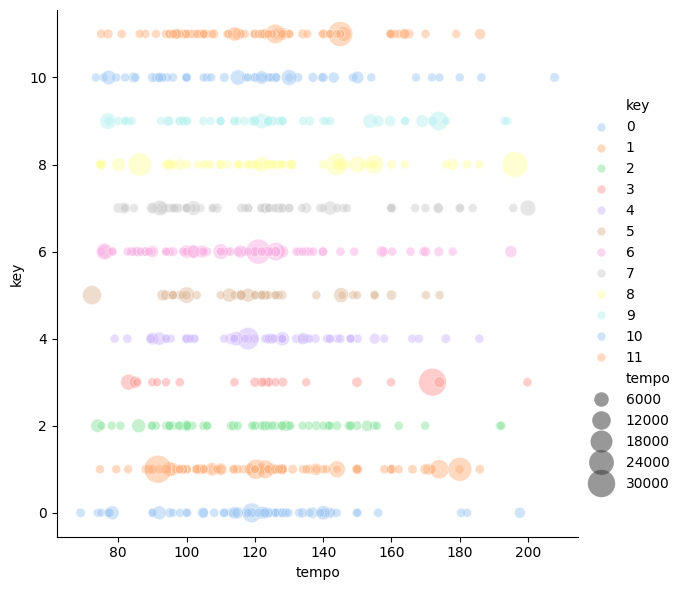

In [152]:
sns.relplot(x="tempo", y="key", hue="key", size=artist_summary['tempo'],
            sizes=(40, 400), alpha=.5, palette="pastel",
            height=6, data=songData)

In [153]:
avgKeyperArtist = songData.groupby('artistName', as_index=True)['key'].mean().reset_index()

In [154]:
avgKeyperArtist.head()

,artistName,key
0,$teev,4.0
1,2 Chainz,8.0
2,3LAU,3.4
3,5 Seconds of Summer,6.6
4,88rising,2.0


# Analyse Features of Playlist

In [ ]:
playListdf = pd.read_csv('playlist.csv')
playListdf.drop(columns=['Unnamed: 0'],inplace=True)
playListdf.set_index('id',inplace=True)
playListdf = playListdf[playListdf['list_name']!='Yoga Mix']
playListdf.head(20)

,spotify_id,list_name,list_id,song_id,song_name,artist,popularity,release_date,energy,liveness,tempo,speechiness,acousticness,instrumentalness,danceability,duration_ms,loudness,valence,mode,key
id,,,,,,,,,,,,,,,,,,,,
2,5YEjVJDZUPPybUvNWWfDM0,Chillax Dance Mix,5YEjVJDZUPPybUvNWWfDM0,2mCF8L0brIs88eH6Kf2h9p,Fast Car,Jonas Blue,68.0,2015-12-04,0.570,0.2990,113.945,0.0520,0.484000,0.000000,0.644,212424.0,-6.994,0.527,1.0,9.0
2,5YEjVJDZUPPybUvNWWfDM0,Chillax Dance Mix,5YEjVJDZUPPybUvNWWfDM0,2tnVG71enUj33Ic2nFN6kZ,Ride It,Regard,86.0,2019-07-26,0.751,0.1060,117.948,0.0874,0.177000,0.000064,0.880,157606.0,-4.258,0.884,0.0,7.0
2,5YEjVJDZUPPybUvNWWfDM0,Chillax Dance Mix,5YEjVJDZUPPybUvNWWfDM0,2tnVG71enUj33Ic2nFN6kZ,Ride It,Regard,86.0,2019-07-26,0.751,0.1060,117.948,0.0874,0.177000,0.000064,0.880,157606.0,-4.258,0.884,0.0,7.0
2,5YEjVJDZUPPybUvNWWfDM0,Chillax Dance Mix,5YEjVJDZUPPybUvNWWfDM0,0vbtURX4qv1l7besfwmnD8,I Took A Pill In Ibiza - Seeb Remix,Mike Posner,77.0,2016-05-06,0.714,0.0843,101.969,0.1110,0.035300,0.000008,0.664,197933.0,-6.645,0.710,0.0,7.0
2,5YEjVJDZUPPybUvNWWfDM0,Chillax Dance Mix,5YEjVJDZUPPybUvNWWfDM0,4WxU1gDVmoH6gstgR0MT78,Lean On,Major Lazer,42.0,2015-06-01,0.809,0.5650,98.007,0.0625,0.003460,0.001230,0.723,176561.0,-3.081,0.274,0.0,7.0
2,5YEjVJDZUPPybUvNWWfDM0,Chillax Dance Mix,5YEjVJDZUPPybUvNWWfDM0,66wF9HWqR8RpQ47tiVQpgx,Last Hurrah - David Guetta Remix,Bebe Rexha,58.0,2019-04-19,0.712,0.2100,91.033,0.0528,0.105000,0.000002,0.683,191868.0,-6.954,0.590,0.0,11.0
2,5YEjVJDZUPPybUvNWWfDM0,Chillax Dance Mix,5YEjVJDZUPPybUvNWWfDM0,4GSDkZt7GcmzBWmsMcpaVO,Dancing In The Moonlight (feat. NEIMY),Jubël,77.0,2018-06-22,0.615,0.1870,119.843,0.0644,0.270000,0.000000,0.659,164010.0,-5.865,0.193,0.0,11.0
2,5YEjVJDZUPPybUvNWWfDM0,Chillax Dance Mix,5YEjVJDZUPPybUvNWWfDM0,5c0lWlmIyCq7hzBhpZasYL,Weekend Vibe,Jubël,69.0,2021-01-15,0.742,0.1860,110.026,0.0496,0.009120,0.000001,0.688,166909.0,-6.363,0.740,1.0,5.0
2,5YEjVJDZUPPybUvNWWfDM0,Chillax Dance Mix,5YEjVJDZUPPybUvNWWfDM0,2F83FxNVkK6PPMHuYnwyVc,Let It Be Me (feat. Ava Max),David Guetta,67.0,2018-09-14,0.529,0.1810,102.048,0.0505,0.128000,0.000000,0.743,172933.0,-6.187,0.438,0.0,7.0


In [160]:
comparePlaylists = playListdf.groupby('list_name').agg({'energy': 'mean', 'danceability': 'mean', 'valence': 'mean',
                                     'liveness': 'mean', 'acousticness': 'mean'})
comparePlaylists.head(3)


,energy,danceability,valence,liveness,acousticness
list_name,,,,,
Adventure,0.793200,0.630600,0.525400,0.172340,0.120258
Beats/EDM,0.742615,0.705330,0.529273,0.192499,0.097811
Chillax Dance Mix,0.707769,0.748769,0.595269,0.157681,0.180269


In [170]:
from math import *
def plot_radar(idx,color):
  # categories
  category = ['energy', 'danceability', 'valence', 'liveness', 'acousticness']
  N = len(category)

  #values
  values = comparePlaylists.iloc[idx].to_list()
  values += values[:1]

  # calculate angle for each category
  angles = [n / float(N) * 2 * pi for n in range(N) ]
  angles += angles[:1]

  # plot
  plt.polar(angles, values, marker = '.', color=color)
  plt.fill(angles, values, alpha=0.3, color=color)

  # x labels
  plt.xticks(angles[:-1], category)

  # y labels
  plt.yticks([0.2,0.4,0.6,0.8])
  plt.ylim(0,1)

In [171]:
color = ['crimson', 'teal', 'yellowgreen', 'gold', 'maroon', 'gray', 'lime', 'slateblue', 'chocolate', 'darkcyan']

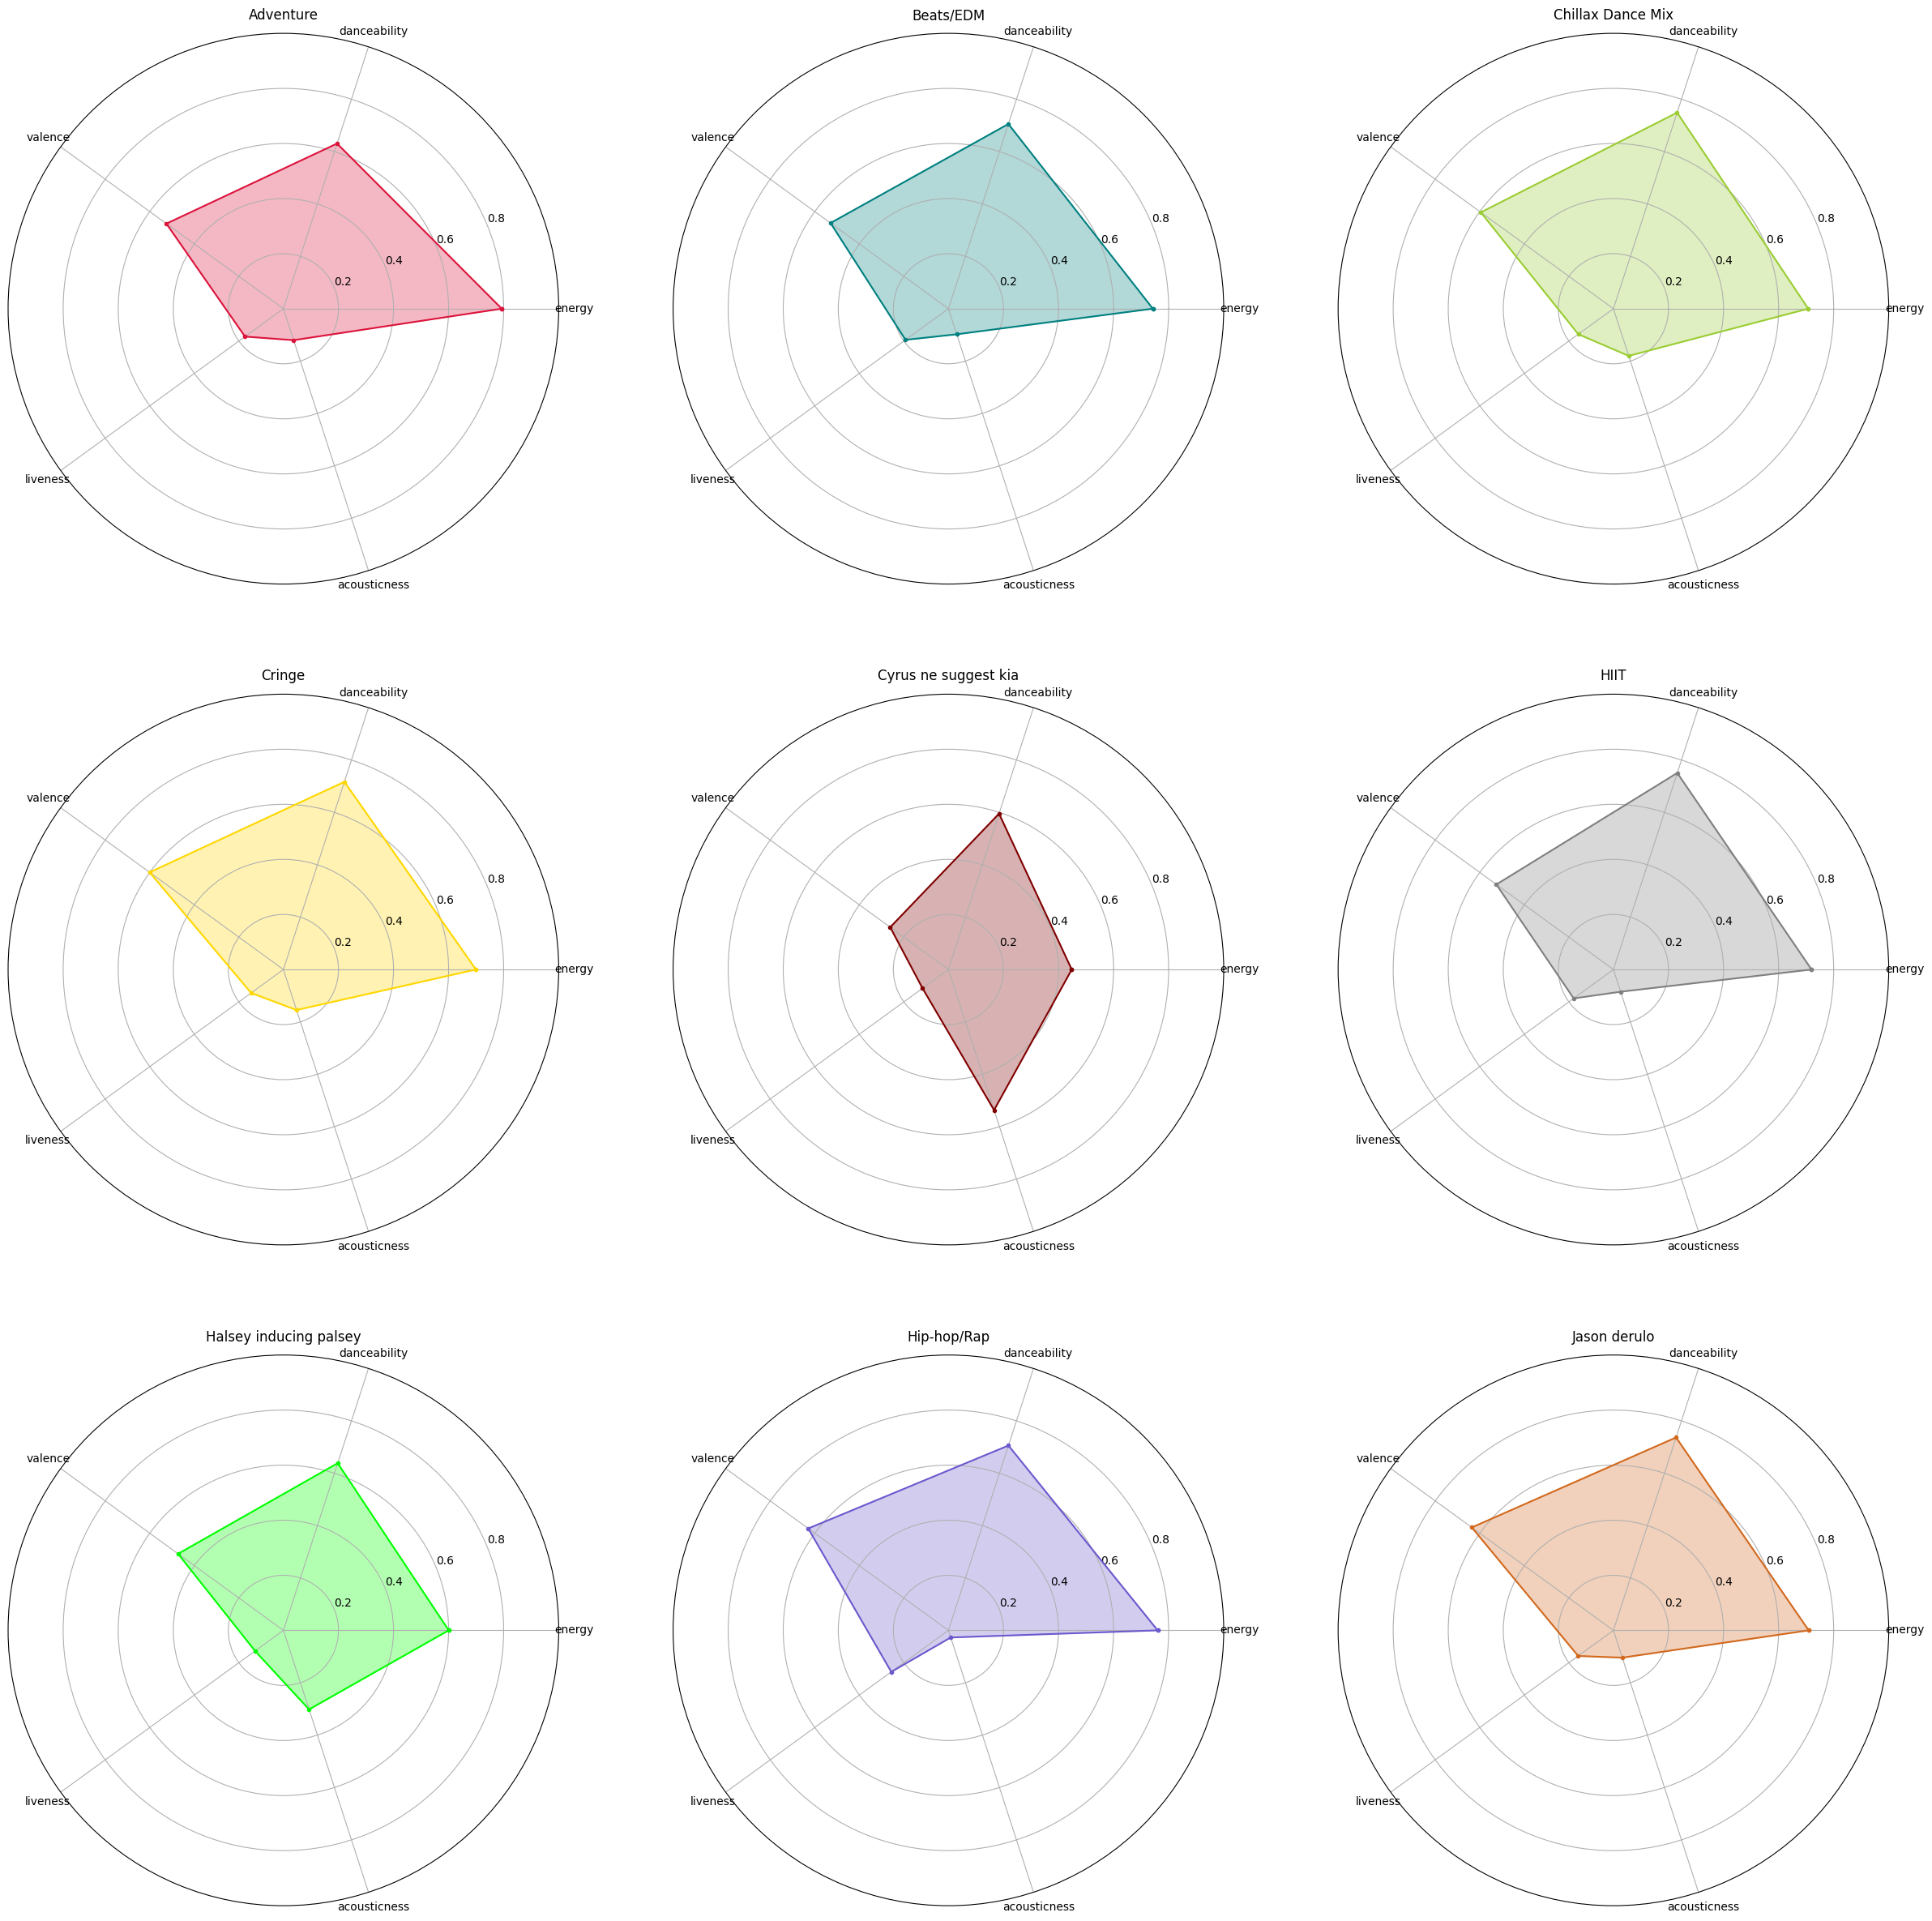

In [173]:
pname = comparePlaylists.index.tolist()
plt.rcParams['figure.figsize'] = (30,30)
for i in range(9):
  k = i+1
  ax = plt.subplot(int('33' + str(k)), polar='True')
  ax.title.set_text(pname[i])
  plot_radar(i,color[i])

plt.show()

In [174]:
key_mode = playListdf.groupby(["key","mode"], as_index=False)["song_id"].count()
key_mode.head(3)

,key,mode,song_id
0,0.0,0.0,5
1,0.0,1.0,20
2,1.0,0.0,14


In [175]:
# map the key in number to the real key represented in alphabet
key_dic = {0: "C",
           1: "C♯/D♭",
           2: "D",
           3: "D♯/E♭",
           4: "E",
           5: "F",
           6: "F♯/G♭",
           7: "G",
           8: "G♯/A♭",
           9: "A",
           10: "A♯/B♭",
           11: "B"}
key_mode = key_mode.replace({"key": key_dic})

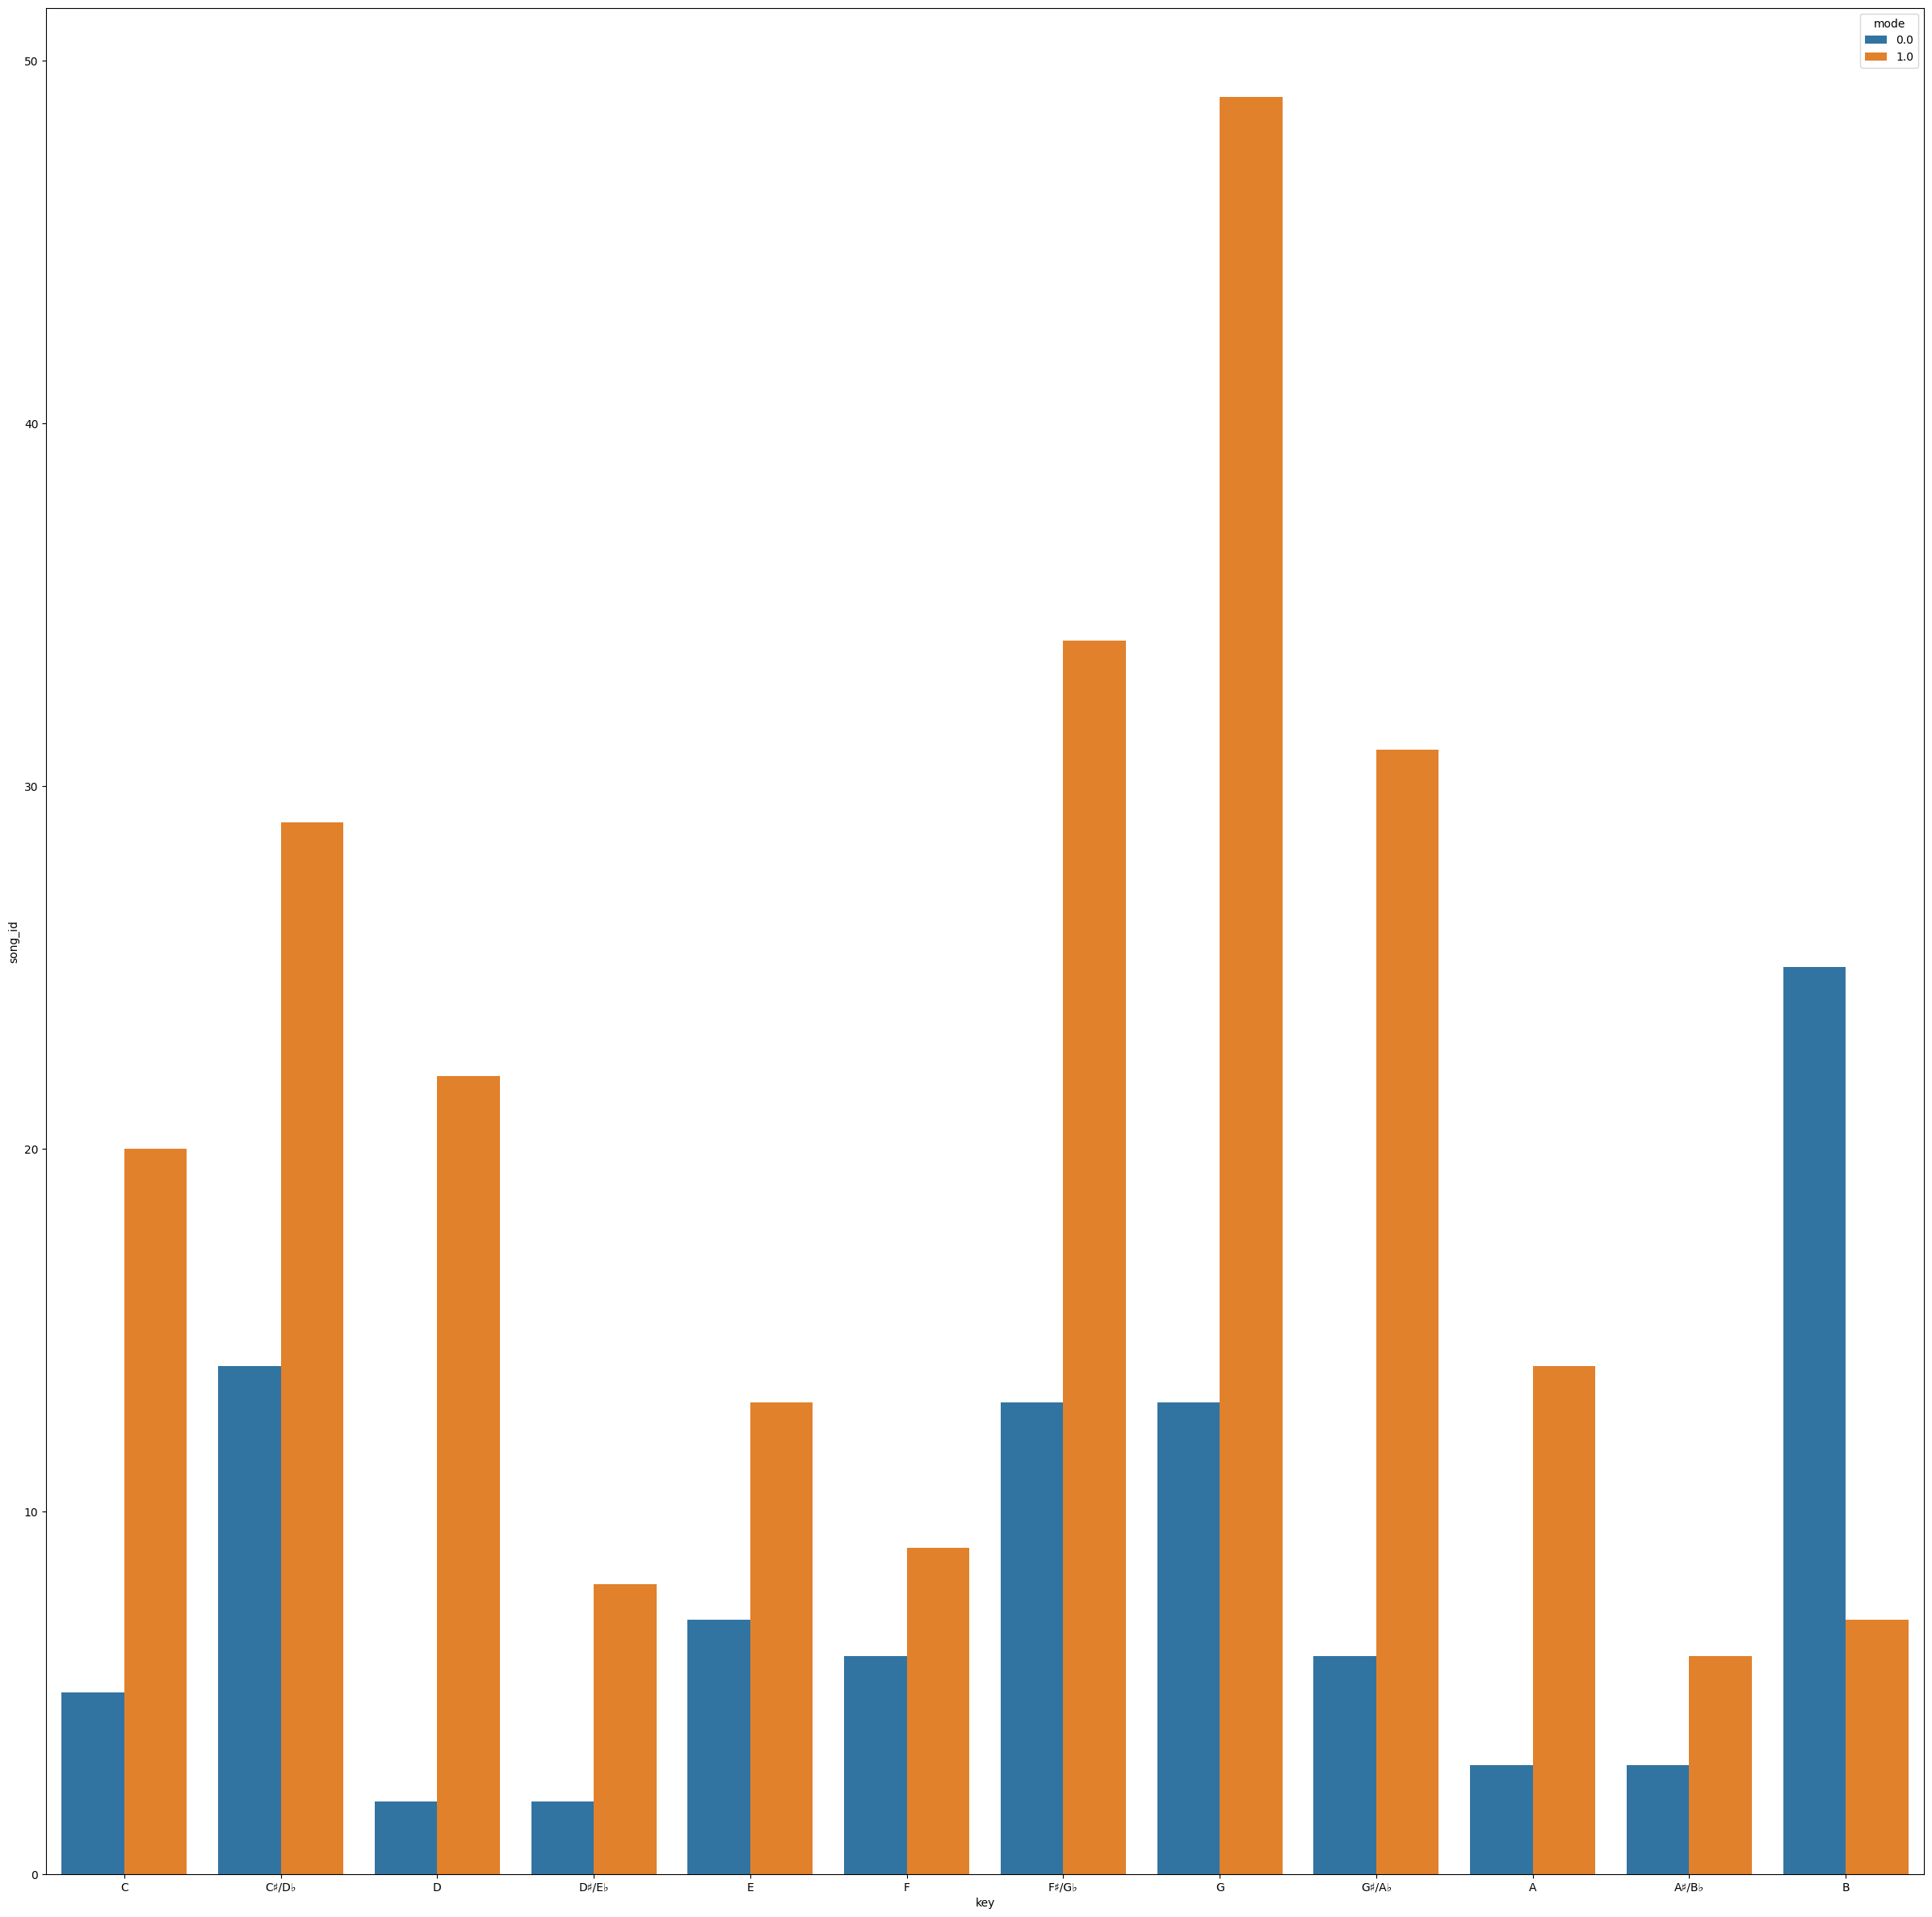

In [176]:
sns.barplot(data=key_mode, x='key', y='song_id', hue='mode')
plt.show()

- Preference for Minor Mode: The dataset shows a stronger preference for minor modes, especially in keys like F, G, and C, which may indicate a tendency towards compositions with a darker or more reflective mood.

- Popularity of Specific Keys: F minor, G minor, and C minor stand out as the most popular keys in the dataset, especially in minor mode.

- Less Common Keys: Keys like D♯/E♭ and A♯/B♭ are less common in both major and minor modes, suggesting that these keys might be less favored in the songs sampled.